### Import libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer,roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score,StratifiedKFold

### Import dataset

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/KnowledgeBase/NSE_data_all_stocks_2022_jan_to_may-edit2.csv")

In [ ]:
dataset

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,0.84%,"57,700",-
1,4-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.7,11.85,11.8,11.75,0.05,0.43%,"86,600",-
2,5-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.8,11.75,11.8,-0.05,0.42%,"72,800",-
3,6-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.7,11.9,11.8,11.75,0.05,0.43%,"128,900",-
4,7-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.95,11.8,11.8,-,-,"202,600",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,25-May-22,SCAN,WPP ScanGroup Plc,2.82,6.1,2.95,3,2.97,2.86,0.11,3.85%,"57,900",-
6728,26-May-22,SCAN,WPP ScanGroup Plc,2.82,6.1,2.94,3,2.97,2.97,-,-,"25,800",-
6729,27-May-22,SCAN,WPP ScanGroup Plc,2.82,6.1,2.95,3,2.98,2.97,0.01,0.34%,"112,200",-
6730,30-May-22,SCAN,WPP ScanGroup Plc,2.82,6.1,2.98,3,3,2.98,0.02,0.67%,"38,100",-


### Data Preprocessing

In [ ]:
    ## Preprocessing the string data
    ## eg remove ',' in thousands: 1,000.00
    ## Converting it to float data type

    dataset['Previous'] = dataset['Previous'].str.replace(',', '').astype(float)
    dataset['12m Low'] = dataset['12m Low'].str.replace(',', '').astype(float)
    dataset['12m High'] = dataset['12m High'].str.replace(',', '').astype(float)
    dataset['Day Low'] = dataset['Day Low'].str.replace(',', '').astype(float)
    dataset['Day High'] = dataset['Day High'].str.replace(',', '').astype(float)
    dataset['Day Price'] = dataset['Day Price'].str.replace(',', '').astype(float)


### Train and Test Split

In [ ]:
## train-test split

## X is the predictor variable
X = dataset[['Previous','12m Low', '12m High', 'Day Low', 'Day High']]
## y is the target variable
y = dataset['Day Price']

split = int(0.8 * len(dataset))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [ ]:
unique_companies = dataset['Name'].unique()

In [ ]:
print("There are {number} unique companies".format(number=len(unique_companies)))

There are 66 unique companies


In [ ]:
unique_companies

array(['ABSA Bank Kenya Plc', 'ABSA NewGold ETF', 'ARM Cement Plc',
       'Bamburi Cement Ltd', 'BK Group Plc', 'BOC Kenya Plc',
       'Britam Holdings Plc', 'British American Tobacco Kenya Plc',
       'Car and General (K) Ltd', 'Carbacid Investments Plc',
       'Centum Investment Company Plc', 'CIC Insurance Group Ltd',
       'Co-operative Bank of Kenya Ltd', 'Crown Paints Kenya Plc',
       'Deacons (East Africa) Plc', 'Diamond Trust Bank Kenya Ltd',
       'Eaagads Ltd', 'East African Breweries Ltd',
       'East African Cables Ltd', 'East African Portland Cement Ltd',
       'Equity Group Holdings Plc', 'Eveready East Africa Ltd',
       'Express Kenya Plc', 'Flame Tree Group Holdings Ltd',
       'HF Group Ltd', 'Home Afrika Ltd', 'Homeboyz Entertainment Plc',
       'I & M Holdings Plc', 'Jubilee Holdings Ltd', 'Kakuzi Plc',
       'Kapchorua Tea Kenya Plc', 'KCB Group Plc', 'Kenya Airways Plc',
       'Kenya Electricity Generating Company Plc', 'Kenya Orchards Ltd',
       


 Model for ABSA Bank Kenya Plc:
MSE (Train): 0.006775969626503138
MSE (Test): 0.01037442313154557 



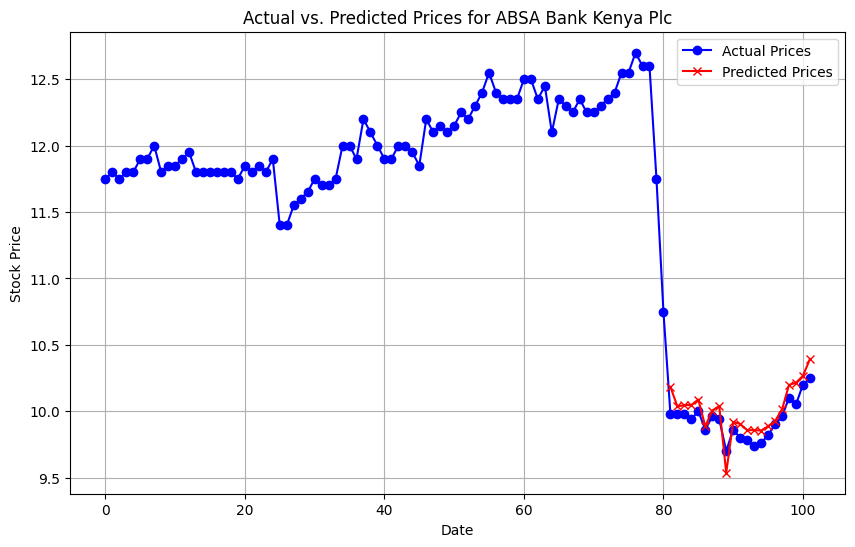


 Model for ABSA NewGold ETF:
MSE (Train): 0.0
MSE (Test): 0.0 



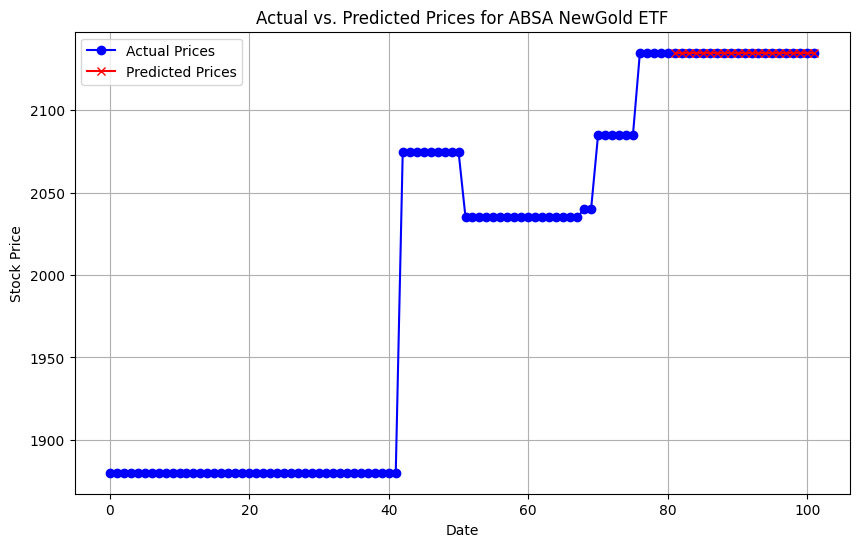


 Model for ARM Cement Plc:
MSE (Train): 7.888609052210118e-31
MSE (Test): 7.888609052210118e-31 



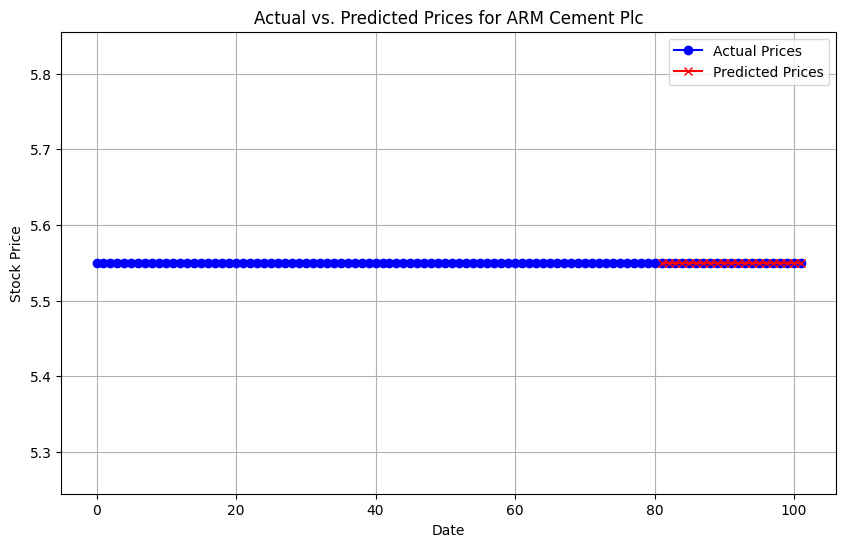


 Model for Bamburi Cement Ltd:
MSE (Train): 0.033770771654834005
MSE (Test): 0.09265568386479066 



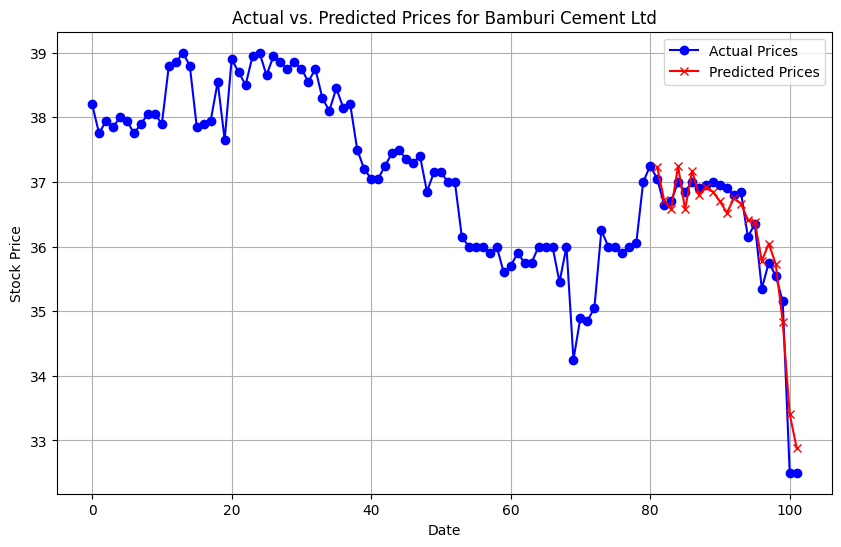


 Model for BK Group Plc:
MSE (Train): 0.011392676213879706
MSE (Test): 0.010159665071540596 



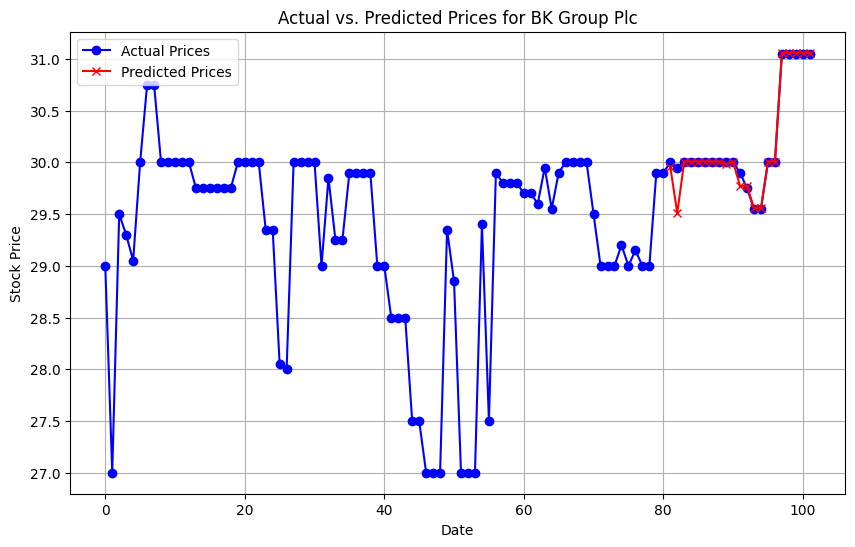

In [ ]:
for company in unique_companies[:5]:
    company_data = dataset[dataset['Name'] == company]


    # Use the 'Previous_Price','12m Low', '12m High', 'Day Low', and 'Day High' as the features
    X = company_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High']]
    y = company_data['Day Price']


    # Split data into training and testing sets
    split = int(0.8 * len(company_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # Train the model
    model = LinearRegression()

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate Model Performance
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print(f'\n Model for {company}:')
    print(f'MSE (Train): {mse_train}')
    print(f'MSE (Test): {mse_test} \n')

    company_data = company_data.reset_index()

    plt.figure(figsize=(10, 6))

    # Plot actual prices
    plt.plot(company_data.index, company_data['Day Price'], label='Actual Prices', marker='o', color='blue')

    # Plot predicted prices
    plt.plot(company_data.index[-len(y_pred_test):], y_pred_test, label='Predicted Prices', marker='x', color='red')

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Actual vs. Predicted Prices for {company}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Classification Problem



In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/KnowledgeBase/NSE_data_all_stocks_2022_jan_to_may-edit2.csv")

In [ ]:
dataset['Previous'] = dataset['Previous'].str.replace(',', '').astype(float)
dataset['12m Low'] = dataset['12m Low'].str.replace(',', '').astype(float)
dataset['12m High'] = dataset['12m High'].str.replace(',', '').astype(float)
dataset['Day Low'] = dataset['Day Low'].str.replace(',', '').astype(float)
dataset['Day High'] = dataset['Day High'].str.replace(',', '').astype(float)
dataset['Day Price'] = dataset['Day Price'].str.replace(',', '').astype(float)

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        11
           1       0.00      0.00      0.00        10

    accuracy                           0.52        21
   macro avg       0.26      0.50      0.34        21
weighted avg       0.27      0.52      0.36        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


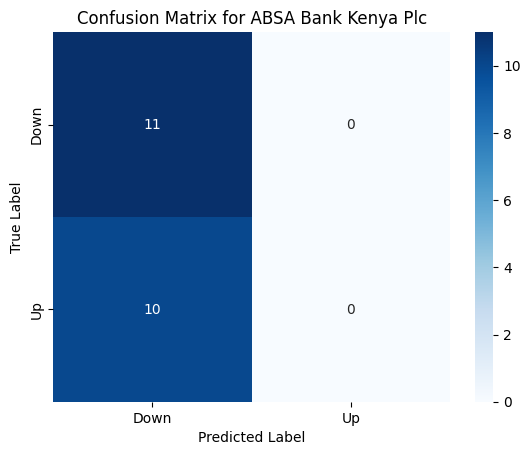


 Cross Validation for  ABSA Bank Kenya Plc
Cross-Validation Scores: [0.69230769 0.80769231 0.76       0.72      ]
Mean Accuracy: 0.7449999999999999
Max Accuracy: 0.8076923076923077





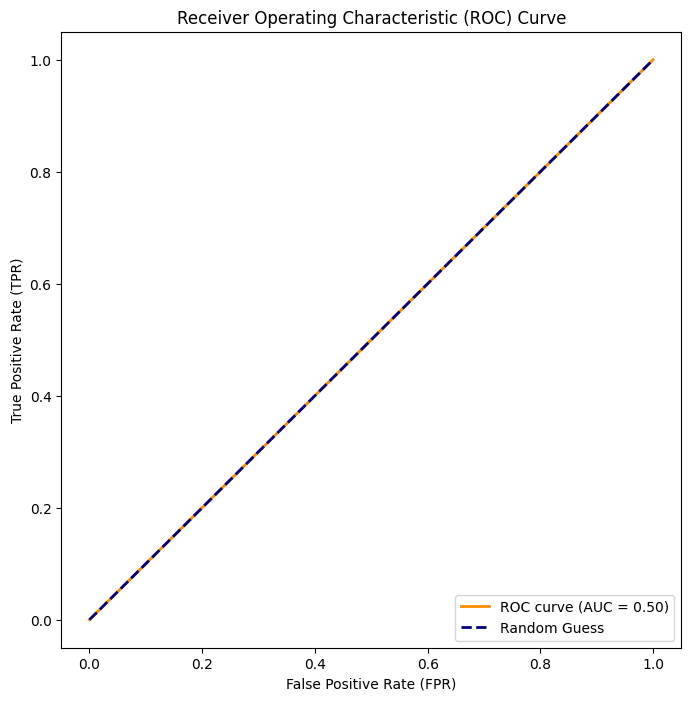

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



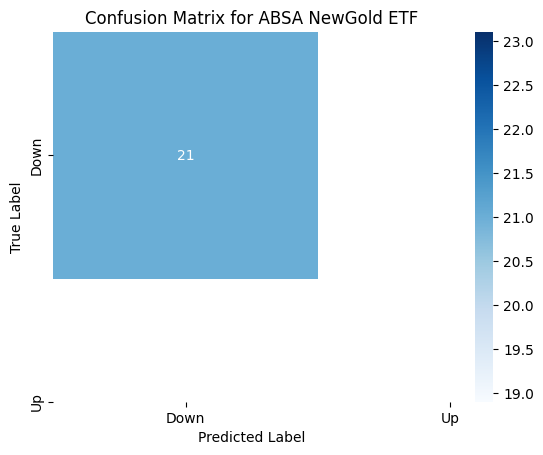


 Cross Validation for  ABSA NewGold ETF
Cross-Validation Scores: [0.96153846 0.96153846 0.92       0.96      ]
Mean Accuracy: 0.9507692307692308
Max Accuracy: 0.9615384615384616





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


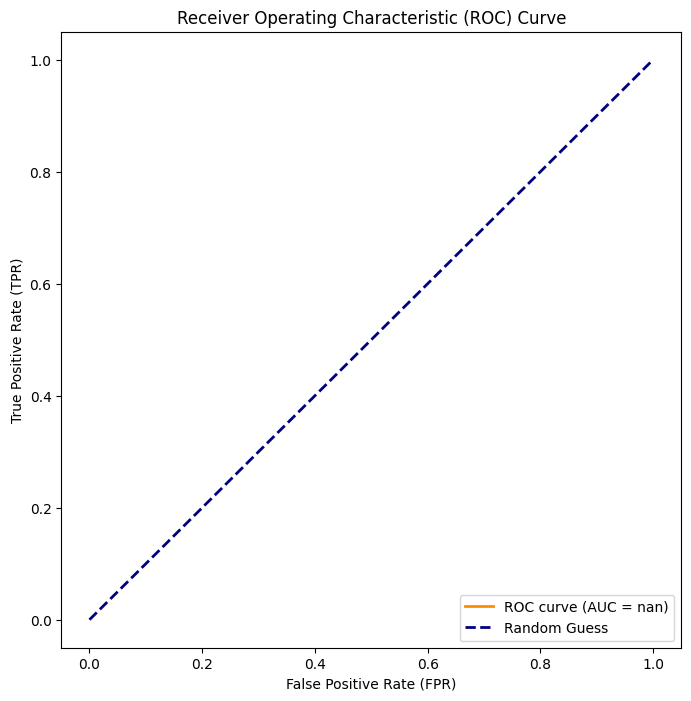

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



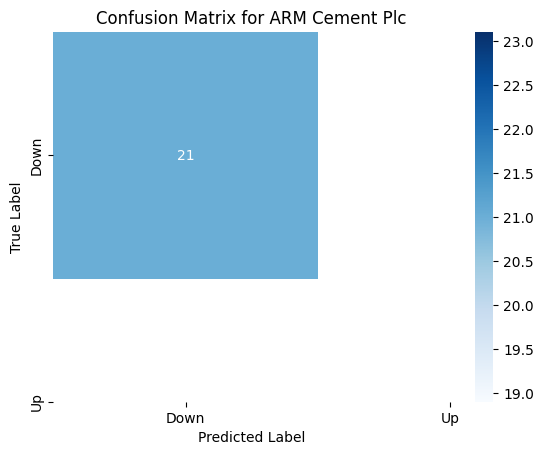


 Cross Validation for  ARM Cement Plc
Cross-Validation Scores: [1. 1. 1. 1.]
Mean Accuracy: 1.0
Max Accuracy: 1.0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


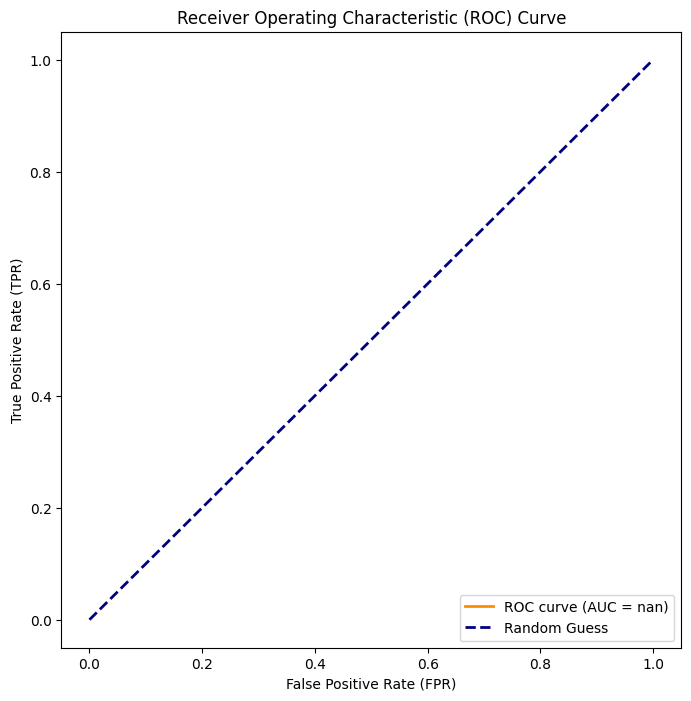

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.55      0.75      0.63         8

    accuracy                           0.67        21
   macro avg       0.67      0.68      0.66        21
weighted avg       0.70      0.67      0.67        21



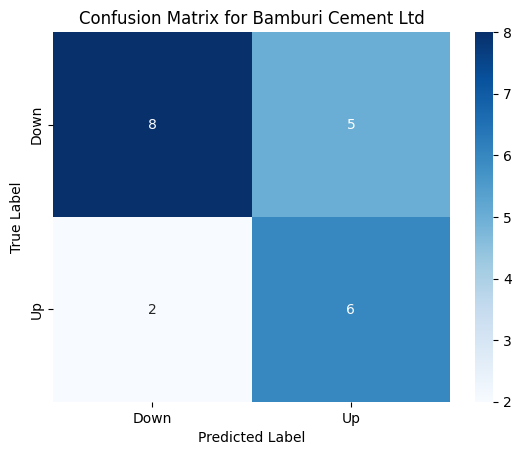


 Cross Validation for  Bamburi Cement Ltd
Cross-Validation Scores: [0.65384615 0.76923077 0.68       0.68      ]
Mean Accuracy: 0.6957692307692308
Max Accuracy: 0.7692307692307693





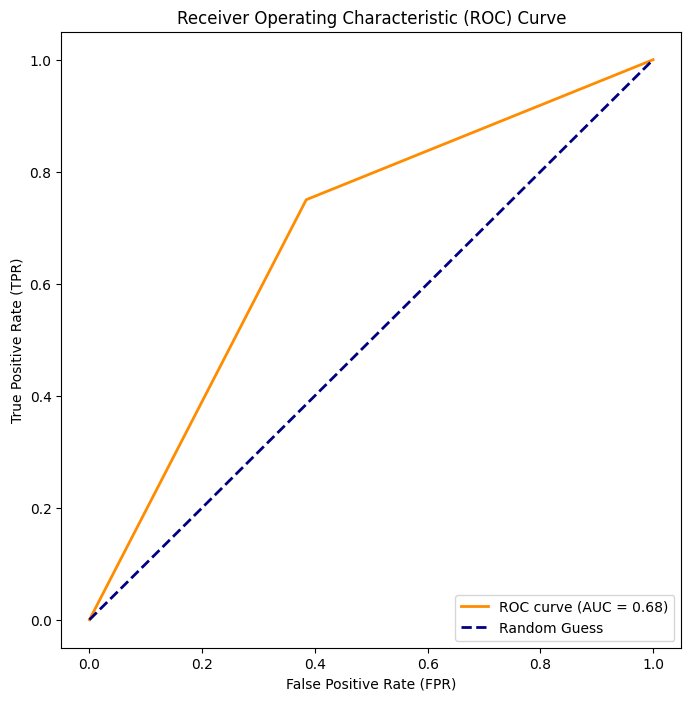

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.50      1.00      0.67         4

    accuracy                           0.81        21
   macro avg       0.75      0.88      0.77        21
weighted avg       0.90      0.81      0.83        21



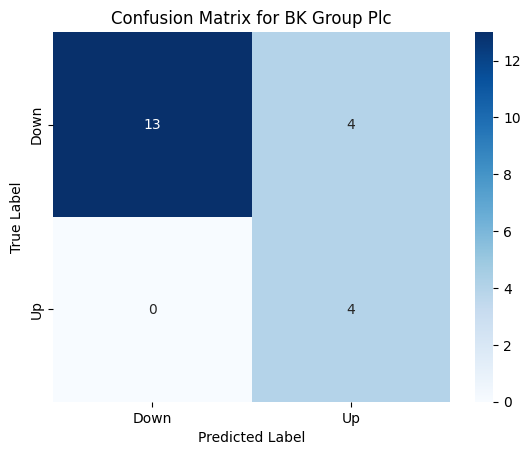


 Cross Validation for  BK Group Plc
Cross-Validation Scores: [0.92307692 0.92307692 0.88       0.96      ]
Mean Accuracy: 0.9215384615384615
Max Accuracy: 0.96





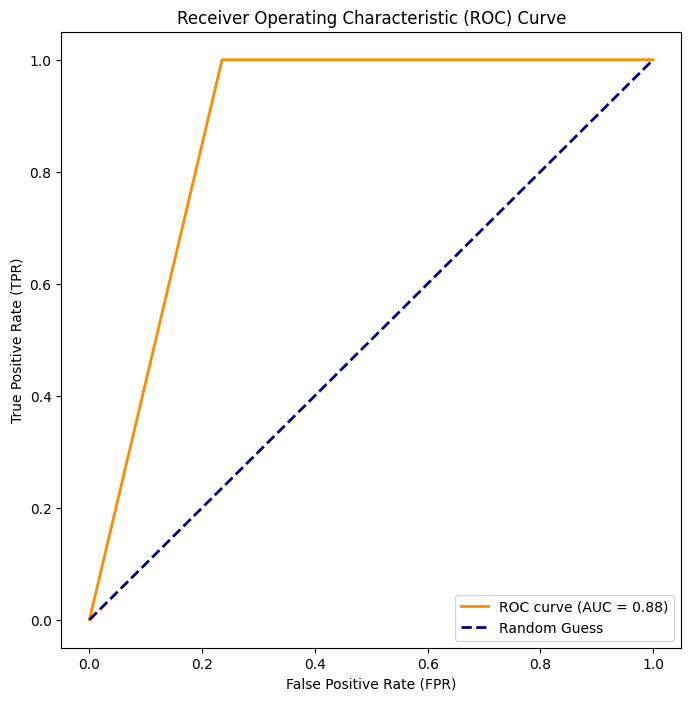

In [ ]:
all_accuracy=[]
dataset['Change'] = pd.to_numeric(dataset['Change'],errors='coerce')

dataset.loc[:,'PriceMovement'] = (dataset['Change']>0).astype(int)

for company in unique_companies[:5]:
    company_data = dataset[dataset['Name'] == company]

    # Features
    X = company_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High','Day Price']]
    y = company_data['PriceMovement']

    # Split data into training and testing sets
    split = int(0.8 * len(company_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # Initialize and train Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf_classifier.fit(X_train, y_train)

    y_test = y_test.astype(int)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    all_accuracy.append(accuracy)

    ## classification report
    print(classification_report(y_test, y_pred))

    ## confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title('Confusion Matrix for {comp}'.format(comp=company))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    ## cross validation, using 4 folds
    stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_classifier, X, y, cv=stratified_cv, scoring=make_scorer(accuracy_score))
    # Display cross-validation scores
    print("\n Cross Validation for ",company)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print("Max Accuracy:", max(cv_scores))
    print("\n\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

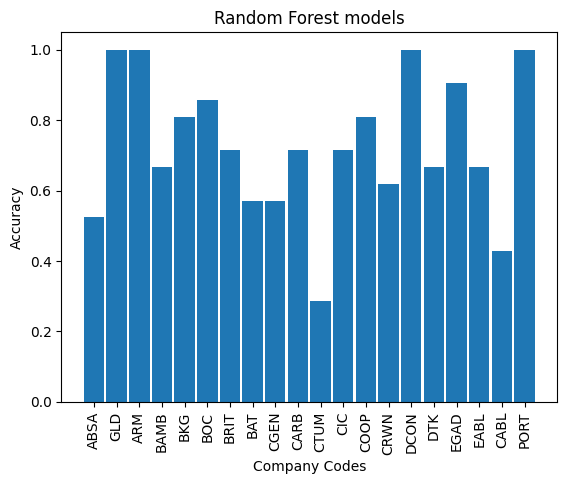

In [ ]:
## plot
unique_codes = dataset['Code'].unique()[:20]

plt.bar(unique_codes,all_accuracy,width=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Company Codes")
plt.ylabel("Accuracy")
plt.title("Random Forest models")
plt.show()